# Sentiment Scores: Letters

For system details and resources, see PhD_SystemCheck.ipynb and PhD_Modules.ipynb

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import re
import numpy as np

In [2]:
tokenizer = RegexpTokenizer('\w+')
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

In [3]:
len(sentimentAnalyzer.lexicon)

7502

In [4]:
# Here I am writing the file to a csv to figure out what is missing.
#with open('20240331_PhD_VaderLexicon-mdcleaned.csv', 'w') as f:
    #[f.write('{0},{1}\n'.format(key, value)) for key, value in sentimentAnalyzer.lexicon.items()]

In [5]:
Corpus = PlaintextCorpusReader('letters', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

518

In [6]:
sentiment = pd.DataFrame(columns = ['text','docid','scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

,text,docid,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity


Make a new folder called "cleaned" in the letters folder for the output.

In [7]:
# First calculate scores using the original Vader lexicon

for fileid in Corpus.fileids(): # For each file in the corpus
    f = open("letters/cleaned/" + fileid, "w", encoding='utf-8')
    text = Corpus.raw(fileid) # Place the string into the object "text"
    text = re.sub(",", "", text) # Remove commas (added bc caused problems with diaries csv)
    text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
    text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
    text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
    text = re.sub(r"(— )","", text) # Remove dashes
    text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
    text = re.sub(r"(\˙)","", text) # Replace dot with no space
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    scores = sentimentAnalyzer.polarity_scores(text) # Calculate sentiment scores
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scores['neg'], scores['pos'], scores['neu'], scores['compound']], index=["text", "docid", "totalTokens", "uniqueTokens", "lexicalDiversity", "scoreNeg", "scorePos", "scoreNeu", "scoreCompound"])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    f.write(text)
    f.close()
    print(fileid) # Show progress

S1019-D002.txt
S1019-D004.txt
S1019-D005.txt
S1019-D006.txt
S1019-D007.txt
S1019-D008.txt
S1019-D009.txt
S1019-D010.txt
S1019-D011.txt
S1019-D012.txt
S1019-D013.txt
S1019-D014.txt
S1019-D015.txt
S1019-D016.txt
S1019-D017.txt
S1019-D018.txt
S1019-D019.txt
S1019-D020.txt
S1019-D021.txt
S1019-D022.txt
S1019-D024.txt
S1019-D025.txt
S1019-D026.txt
S1019-D027.txt
S1019-D028.txt
S1019-D029.txt
S1019-D030.txt
S1019-D031.txt
S1019-D032.txt
S1019-D033.txt
S1019-D034.txt
S1019-D035.txt
S1019-D036.txt
S1019-D037.txt
S1019-D038.txt
S1019-D040.txt
S1019-D041.txt
S1019-D042.txt
S1019-D043.txt
S1019-D046.txt
S1019-D047.txt
S1019-D048.txt
S1019-D049.txt
S1019-D050.txt
S1019-D052.txt
S1019-D053.txt
S1019-D054.txt
S1019-D055.txt
S1019-D056.txt
S1019-D057.txt
S1019-D058.txt
S2344-D040.txt
S2344-D043.txt
S2344-D051.txt
S2344-D052.txt
S2344-D053.txt
S2344-D055.txt
S2344-D056.txt
S2344-D057.txt
S2344-D058.txt
S2344-D059.txt
S2344-D060.txt
S2344-D061.txt
S2344-D062.txt
S2344-D063.txt
S2344-D064.txt
S2344-D065

In [8]:
sentiment.head()

,text,docid,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity
0,TRINIDAD On Train from Steubenville Ohio to C...,S1019-D002.txt,0.052,0.136,0.812,0.9995,1998,773,0.386887
1,Kansas City Dec 6 1872. Number one! Number tw...,S1019-D004.txt,0.058,0.114,0.828,0.9993,2474,841,0.339935
2,Trinidad December 10 1872. My dearest dear: H...,S1019-D005.txt,0.06,0.103,0.837,0.9986,2281,828,0.362999
3,December 21. Rumor is loud in predicting an a...,S1019-D006.txt,0.062,0.104,0.833,0.9985,2272,863,0.379842
4,March 1 1873. My Dear Sister Justina: It is s...,S1019-D007.txt,0.072,0.081,0.847,0.9643,2117,805,0.380255


Put the compound scores into an object.

In [10]:
# Remove the .txt from the file name
sentiment['docid'] = sentiment['docid'].str.replace(r'.txt', '', regex=True)
sentiment

,text,docid,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity
0,TRINIDAD On Train from Steubenville Ohio to C...,S1019-D002,0.052,0.136,0.812,0.9995,1998,773,0.386887
1,Kansas City Dec 6 1872. Number one! Number tw...,S1019-D004,0.058,0.114,0.828,0.9993,2474,841,0.339935
2,Trinidad December 10 1872. My dearest dear: H...,S1019-D005,0.06,0.103,0.837,0.9986,2281,828,0.362999
3,December 21. Rumor is loud in predicting an a...,S1019-D006,0.062,0.104,0.833,0.9985,2272,863,0.379842
4,March 1 1873. My Dear Sister Justina: It is s...,S1019-D007,0.072,0.081,0.847,0.9643,2117,805,0.380255
...,...,...,...,...,...,...,...,...,...
513,Hang Town California Feb'y 15th 1850 Dear Sir...,S9957-D013,0.07,0.13,0.8,0.9946,669,356,0.532138
514,Hang Town California March 22 1850 Dear Sir: ...,S9957-D014,0.083,0.156,0.761,0.9168,163,113,0.693252
515,California Weaver Creek April 4th 1851 Dear M...,S9957-D015,0.098,0.149,0.754,0.9911,744,366,0.491935
516,Hudson State New York July 6th 1828 Dear Paren...,S9974-D008,0.065,0.147,0.788,0.9982,1110,419,0.377477


<Axes: >

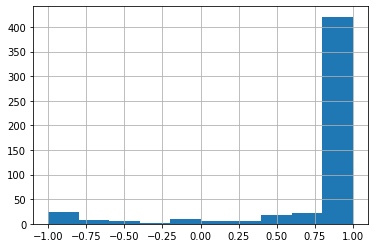

In [11]:
sentiment['scoreCompound'].hist()

This is the baseline distribution. Let's try the large modified lexicon now. Re-start the kernal then run the cell below. Switch out the lexicons in the nltk_data folder.

In [7]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import re

tokenizer = RegexpTokenizer('\w+')
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

len(sentimentAnalyzer.lexicon)

14259

In [8]:
Corpus = PlaintextCorpusReader('letters', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

518

In [9]:
sentiment = pd.DataFrame(columns = ['text','docid','scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

,text,docid,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity


In [10]:
# Now calculate scores using the large Vader + socialSent lexicon

for fileid in Corpus.fileids(): # For each file in the corpus
    f = open("letters/cleaned/" + fileid, "w", encoding='utf-8')
    text = Corpus.raw(fileid) # Place the string into the object "text"
    text = re.sub(",", "", text) # Remove commas (added bc caused problems with diaries csv)
    text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
    text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
    text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
    text = re.sub(r"(— )","", text) # Remove dashes
    text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
    text = re.sub(r"(\˙)","", text) # Replace dot with no space
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    scores = sentimentAnalyzer.polarity_scores(text) # Calculate sentiment scores
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scores['neg'], scores['pos'], scores['neu'], scores['compound']], index=["text", "docid", "totalTokens", "uniqueTokens", "lexicalDiversity", "scoreNeg", "scorePos", "scoreNeu", "scoreCompound"])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    f.write(text)
    f.close()
    print(fileid) # Show progress

S1019-D002.txt
S1019-D004.txt
S1019-D005.txt
S1019-D006.txt
S1019-D007.txt
S1019-D008.txt
S1019-D009.txt
S1019-D010.txt
S1019-D011.txt
S1019-D012.txt
S1019-D013.txt
S1019-D014.txt
S1019-D015.txt
S1019-D016.txt
S1019-D017.txt
S1019-D018.txt
S1019-D019.txt
S1019-D020.txt
S1019-D021.txt
S1019-D022.txt
S1019-D024.txt
S1019-D025.txt
S1019-D026.txt
S1019-D027.txt
S1019-D028.txt
S1019-D029.txt
S1019-D030.txt
S1019-D031.txt
S1019-D032.txt
S1019-D033.txt
S1019-D034.txt
S1019-D035.txt
S1019-D036.txt
S1019-D037.txt
S1019-D038.txt
S1019-D040.txt
S1019-D041.txt
S1019-D042.txt
S1019-D043.txt
S1019-D046.txt
S1019-D047.txt
S1019-D048.txt
S1019-D049.txt
S1019-D050.txt
S1019-D052.txt
S1019-D053.txt
S1019-D054.txt
S1019-D055.txt
S1019-D056.txt
S1019-D057.txt
S1019-D058.txt
S2344-D040.txt
S2344-D043.txt
S2344-D051.txt
S2344-D052.txt
S2344-D053.txt
S2344-D055.txt
S2344-D056.txt
S2344-D057.txt
S2344-D058.txt
S2344-D059.txt
S2344-D060.txt
S2344-D061.txt
S2344-D062.txt
S2344-D063.txt
S2344-D064.txt
S2344-D065

<Axes: >

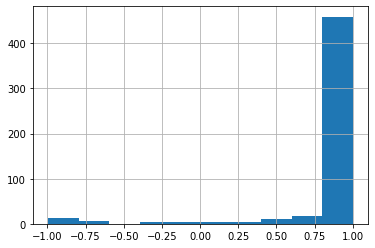

In [11]:
sentiment['scoreCompound'].hist()

The distribution is similar to the original. Now let's try with the medium size lexicon. Again, restart kernel, switch the lexicons again in finder then re-reun code.

In [19]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import re
import numpy as np

tokenizer = RegexpTokenizer('\w+')
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

len(sentimentAnalyzer.lexicon)

7268

In [3]:
Corpus = PlaintextCorpusReader('letters', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

518

In [4]:
sentiment = pd.DataFrame(columns = ['text','docid','scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

,text,docid,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity


In [5]:
# Now calculate scores using the medium Vader + socialSent lexicon

for fileid in Corpus.fileids(): # For each file in the corpus
    f = open("letters/cleaned/" + fileid, "w", encoding='utf-8')
    text = Corpus.raw(fileid) # Place the string into the object "text"
    text = re.sub(",", "", text) # Remove commas (added bc caused problems with diaries csv)
    text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
    text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
    text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
    text = re.sub(r"(— )","", text) # Remove dashes
    text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
    text = re.sub(r"(\˙)","", text) # Replace dot with no space
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    scores = sentimentAnalyzer.polarity_scores(text) # Calculate sentiment scores
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scores['neg'], scores['pos'], scores['neu'], scores['compound']], index=["text", "docid", "totalTokens", "uniqueTokens", "lexicalDiversity", "scoreNeg", "scorePos", "scoreNeu", "scoreCompound"])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    f.write(text)
    f.close()
    print(fileid) # Show progress

S1019-D002.txt
S1019-D004.txt
S1019-D005.txt
S1019-D006.txt
S1019-D007.txt
S1019-D008.txt
S1019-D009.txt
S1019-D010.txt
S1019-D011.txt
S1019-D012.txt
S1019-D013.txt
S1019-D014.txt
S1019-D015.txt
S1019-D016.txt
S1019-D017.txt
S1019-D018.txt
S1019-D019.txt
S1019-D020.txt
S1019-D021.txt
S1019-D022.txt
S1019-D024.txt
S1019-D025.txt
S1019-D026.txt
S1019-D027.txt
S1019-D028.txt
S1019-D029.txt
S1019-D030.txt
S1019-D031.txt
S1019-D032.txt
S1019-D033.txt
S1019-D034.txt
S1019-D035.txt
S1019-D036.txt
S1019-D037.txt
S1019-D038.txt
S1019-D040.txt
S1019-D041.txt
S1019-D042.txt
S1019-D043.txt
S1019-D046.txt
S1019-D047.txt
S1019-D048.txt
S1019-D049.txt
S1019-D050.txt
S1019-D052.txt
S1019-D053.txt
S1019-D054.txt
S1019-D055.txt
S1019-D056.txt
S1019-D057.txt
S1019-D058.txt
S2344-D040.txt
S2344-D043.txt
S2344-D051.txt
S2344-D052.txt
S2344-D053.txt
S2344-D055.txt
S2344-D056.txt
S2344-D057.txt
S2344-D058.txt
S2344-D059.txt
S2344-D060.txt
S2344-D061.txt
S2344-D062.txt
S2344-D063.txt
S2344-D064.txt
S2344-D065

<Axes: >

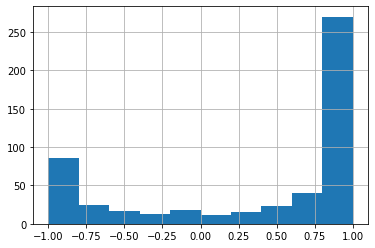

In [3]:
sentiment['scoreCompound'].hist()

This lexicon yields the most variance, which will be best for regression analysis. 

## Summary Stats

In [4]:
sentiment.dtypes

Unnamed: 0            int64
text                 object
docid                object
scoreNeg            float64
scorePos            float64
scoreNeu            float64
scoreCompound       float64
totalTokens         float64
uniqueTokens        float64
lexicalDiversity    float64
dtype: object

In [18]:
sentiment[['scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']] = sentiment[['scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']].astype(str).astype(float)

In [5]:
sentiment[['scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']].describe()

,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity
count,518.000000,518.000000,518.000000,518.000000
mean,0.375417,757.613900,324.227799,0.557130
std,0.764744,1168.829133,297.925026,0.134750
min,-0.999400,44.000000,38.000000,0.197615
25%,-0.367025,213.000000,139.000000,0.451112
50%,0.859000,428.000000,230.500000,0.556721
75%,0.980750,953.250000,425.750000,0.661788
max,1.000000,15429.000000,3049.000000,0.888889


In [8]:
print(len(sentiment.loc[sentiment['totalTokens'] < 86])/len(sentiment))
print(len(sentiment.loc[sentiment['totalTokens'] > 300])/len(sentiment))

0.05019305019305019
0.6042471042471043


In [11]:
sentiment.docid[sentiment['totalTokens'] < 86]

93     S2344-D095.txt
198    S6210-D043.txt
202    S6210-D048.txt
211    S6210-D057.txt
213    S6210-D059.txt
216    S6210-D062.txt
218    S6210-D064.txt
231    S6210-D077.txt
242    S6210-D088.txt
243    S6210-D089.txt
244    S6210-D090.txt
253    S6210-D100.txt
254    S6210-D101.txt
304    S6210-D152.txt
318    S6210-D166.txt
329    S6210-D177.txt
334    S6210-D182.txt
337    S6210-D185.txt
338    S6210-D186.txt
347    S6210-D195.txt
353    S6210-D202.txt
364    S6210-D213.txt
370    S6210-D220.txt
371    S6210-D221.txt
382    S6210-D232.txt
384    S6210-D234.txt
Name: docid, dtype: object

Removing these from the study because they are too short for topic modeling. 

In [20]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import re
import numpy as np

tokenizer = RegexpTokenizer('\w+')
sentimentAnalyzer = SentimentIntensityAnalyzer() #Initialize sentiment scorer

len(sentimentAnalyzer.lexicon)

7268

In [14]:
Corpus = PlaintextCorpusReader('letters', '.*txt') #Define corpus
len(Corpus.fileids()) #How many files

492

In [15]:
sentiment = pd.DataFrame(columns = ['text','docid','scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']) # Create a new dataframe to hold sentences, letter id and compound scores
sentiment.head()

,text,docid,scoreNeg,scorePos,scoreNeu,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity


In [16]:
# Now calculate scores using the medium Vader + socialSent lexicon

for fileid in Corpus.fileids(): # For each file in the corpus
    f = open("letters/cleaned/" + fileid, "w", encoding='utf-8')
    text = Corpus.raw(fileid) # Place the string into the object "text"
    text = re.sub(",", "", text) # Remove commas (added bc caused problems with diaries csv)
    text = re.sub(r"(\. ){2,}","", text) # Remove ellipses
    text = re.sub(r"(\n+)"," ", text) # Replace blank lines with a single space
    text = re.sub(r"(&dot)","", text) # Remove this expression (a dot)
    text = re.sub(r"(— )","", text) # Remove dashes
    text = re.sub(r"(\r)"," ", text) # Replace /r with blank space
    text = re.sub(r"(\˙)","", text) # Replace dot with no space
    tokens = tokenizer.tokenize(text)
    totalTokens = len(tokens)
    uniqueTokens = len(set(tokens))
    lexicalDiversity = uniqueTokens/totalTokens
    scores = sentimentAnalyzer.polarity_scores(text) # Calculate sentiment scores
    new_row = pd.Series([text, fileid, totalTokens, uniqueTokens, lexicalDiversity, scores['neg'], scores['pos'], scores['neu'], scores['compound']], index=["text", "docid", "totalTokens", "uniqueTokens", "lexicalDiversity", "scoreNeg", "scorePos", "scoreNeu", "scoreCompound"])
    sentiment = pd.concat([sentiment, new_row.to_frame().T], ignore_index=True)
    f.write(text)
    f.close()
    print(fileid) # Show progress

S1019-D002.txt
S1019-D004.txt
S1019-D005.txt
S1019-D006.txt
S1019-D007.txt
S1019-D008.txt
S1019-D009.txt
S1019-D010.txt
S1019-D011.txt
S1019-D012.txt
S1019-D013.txt
S1019-D014.txt
S1019-D015.txt
S1019-D016.txt
S1019-D017.txt
S1019-D018.txt
S1019-D019.txt
S1019-D020.txt
S1019-D021.txt
S1019-D022.txt
S1019-D024.txt
S1019-D025.txt
S1019-D026.txt
S1019-D027.txt
S1019-D028.txt
S1019-D029.txt
S1019-D030.txt
S1019-D031.txt
S1019-D032.txt
S1019-D033.txt
S1019-D034.txt
S1019-D035.txt
S1019-D036.txt
S1019-D037.txt
S1019-D038.txt
S1019-D040.txt
S1019-D041.txt
S1019-D042.txt
S1019-D043.txt
S1019-D046.txt
S1019-D047.txt
S1019-D048.txt
S1019-D049.txt
S1019-D050.txt
S1019-D052.txt
S1019-D053.txt
S1019-D054.txt
S1019-D055.txt
S1019-D056.txt
S1019-D057.txt
S1019-D058.txt
S2344-D040.txt
S2344-D043.txt
S2344-D051.txt
S2344-D052.txt
S2344-D053.txt
S2344-D055.txt
S2344-D056.txt
S2344-D057.txt
S2344-D058.txt
S2344-D059.txt
S2344-D060.txt
S2344-D061.txt
S2344-D062.txt
S2344-D063.txt
S2344-D064.txt
S2344-D065

In [23]:
sentiment.dtypes

text                object
docid               object
scoreNeg            object
scorePos            object
scoreNeu            object
scoreCompound       object
totalTokens         object
uniqueTokens        object
lexicalDiversity    object
dtype: object

In [24]:
sentiment[['scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']] = sentiment[['scoreNeg', 'scorePos', 'scoreNeu', 'scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']].astype(str).astype(float)

In [25]:
sentiment[['scoreCompound', 'totalTokens', 'uniqueTokens', 'lexicalDiversity']].describe()

,scoreCompound,totalTokens,uniqueTokens,lexicalDiversity
count,492.000000,492.000000,492.000000,492.000000
mean,0.389018,794.138211,338.548780,0.543997
std,0.771869,1188.219694,298.934754,0.124546
min,-0.999400,86.000000,67.000000,0.197615
25%,-0.350750,231.000000,147.750000,0.446237
50%,0.892700,468.500000,248.500000,0.537454
75%,0.983600,991.750000,442.750000,0.643231
max,1.000000,15429.000000,3049.000000,0.883721


In [30]:
print(len(sentiment.loc[sentiment['totalTokens'] < 86])/len(sentiment))
print(len(sentiment.loc[sentiment['totalTokens'] > 300])/len(sentiment))

0.0
0.6361788617886179


<Axes: >

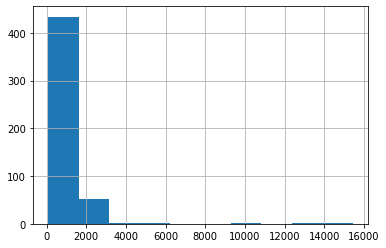

In [26]:
sentiment['totalTokens'].hist()

<Axes: >

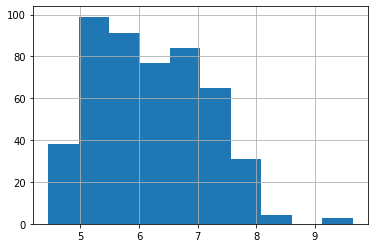

In [32]:
np.log(sentiment['totalTokens']).hist()

<Axes: >

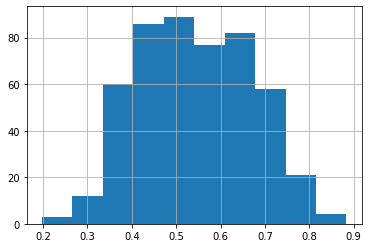

In [33]:
sentiment['lexicalDiversity'].hist()

## Export

In [34]:
sentiment.to_csv('20240405_PhD_SentimentLetter.csv', index = True, encoding="utf-8")